## 04.자동미분

In [1]:
import torch

### 4-1.requires_grad

In [8]:
x = torch.ones(3,requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [9]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\ckddl\AppData\Local\Temp\ipykernel_15836\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [10]:
z = y ** 2
print(z)
# print(z.grad)
# print(z.grad_fn)
# print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4.2 backward()
 - x -> y -> z 계산을 역전파를 통해 기울기를 구함 
 (하나의 노드로) 가중치계산

In [11]:
result = z.sum()
result.backward()

In [12]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3 nograd()
- 역전파를 중지(자동미분 중지)

In [17]:
x = torch.tensor(1.0,requires_grad=True)

print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    y = x **2
    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


### 4-4.detach()
- 그래프에서 연산을 분리

In [19]:
y.detach()

tensor(1.)

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Epch [50/400],Loss:4.3948
Epch [100/400],Loss:4.2099
Epch [150/400],Loss:4.0975
Epch [200/400],Loss:4.0292
Epch [250/400],Loss:3.9876
Epch [300/400],Loss:3.9624
Epch [350/400],Loss:3.9470
Epch [400/400],Loss:3.9377


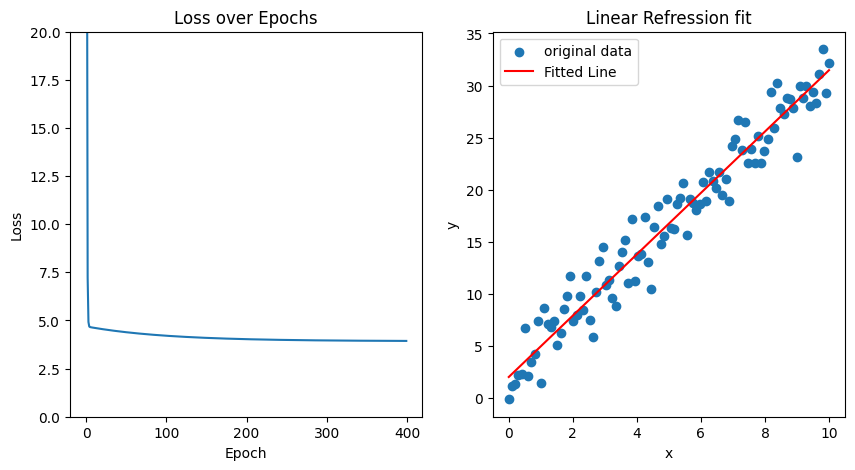

Model paramiters
linear.weight:tensor([[2.9481]])
linear.bias:tensor([1.9930])


In [43]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# 선형회귀 연습

# 1. 입출력 정의
x = torch.linspace(0,10,100).view(-1,1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100,1)*2

# 2. 모델 정의

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        return self.linear(x)
    
model =LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택:MSE,MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사 하강법 -> 어떤 것을 사용할지 선택
#lr = learning rate
optimizer = optim.SGD(model.parameters(),lr =0.01)

# 5.학습 반복
epochs = 400
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()   #기울기 초기화
    outputs = model(x)  #예측값 계산
    loss = loss_function(outputs,y) #손실 계산
    loss.backward() #역전파진행
    optimizer.step()    #가중치 업데이트

    losses.append(loss.item())  #손실값 저장

    if (epoch+1) % 50 ==0:
        print(f"Epch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}")

# 6. 결과 시각화
plt.figure(figsize =(10,5))

# 손실 갑소 그래프
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylim(0,20)
plt.ylabel("Loss")

#데이터와 예측 결과 시각화

plt.subplot(1,2,2)
plt.scatter(x.numpy(),y.numpy(),label = "original data")
plt.plot(x.numpy(),model(x).detach().numpy(),color = "r",label = "Fitted Line")
plt.title("Linear Refression fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model paramiters")
for name,param in model.named_parameters():
    print(f"{name}:{param.data}")

## 실습

### 실습 1. 다중 선형 회귀 구현

Epoch [100/1000],Loss:4.8165
Epoch [200/1000],Loss:4.1418
Epoch [300/1000],Loss:3.7385
Epoch [400/1000],Loss:3.4200
Epoch [500/1000],Loss:3.1674
Epoch [600/1000],Loss:2.9671
Epoch [700/1000],Loss:2.8082
Epoch [800/1000],Loss:2.6819
Epoch [900/1000],Loss:2.5816
Epoch [1000/1000],Loss:2.5018


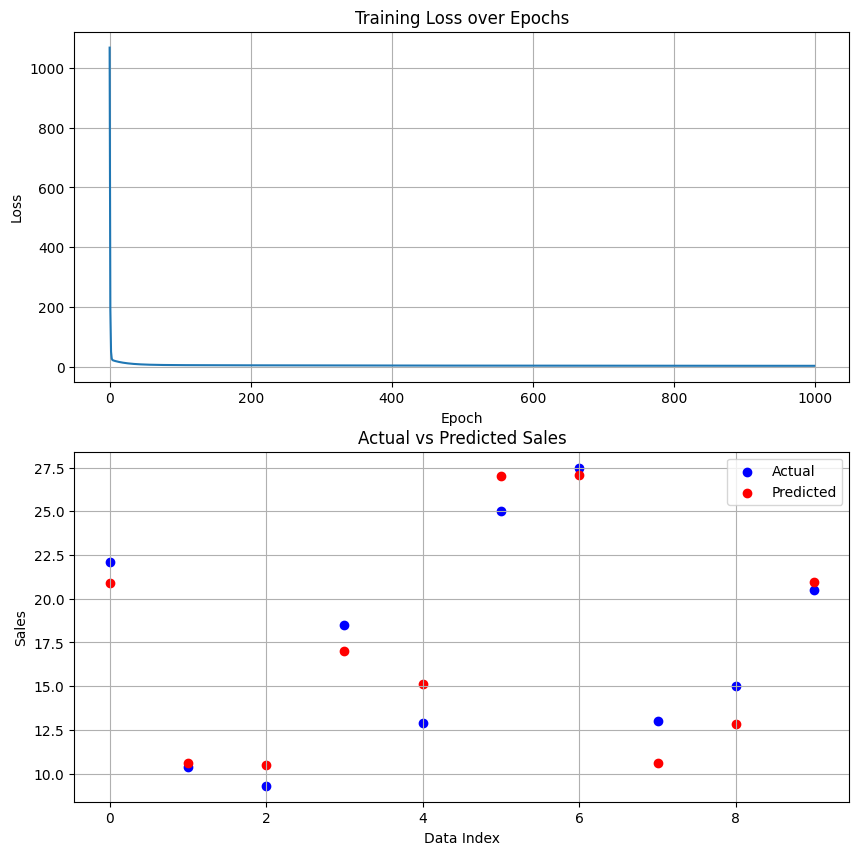

Model paramiters
linear.weight:tensor([[0.2069, 0.3605, 0.0466]])
linear.bias:tensor([0.1359])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
#실습 1 다중 선형 회귀 구현

# 1. 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)
# 2. 모델 정의

class MultipleLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleLinearRegressionModel,self).__init__()# super().__init__() 도가능
        self.linear = nn.Linear(3,1)
        
    def forward(self,x):
        return self.linear(x)
    
model =MultipleLinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택:MSE,MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사 하강법 -> 어떤 것을 사용할지 선택
#lr = learning rate
optimizer = optim.SGD(model.parameters(),lr =0.0001)

# 5.학습 반복
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()   #기울기 초기화
    outputs = model(x)  #예측값 계산
    loss = loss_function(outputs,y) #손실 계산
    loss.backward() #역전파진행
    optimizer.step()    #가중치 업데이트

    losses.append(loss.item())  #손실값 저장

    if (epoch+1) % 100 ==0:
        print(f"Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}")

# 6. 결과 시각화
with torch.no_grad():  # 예측값 생성
    predictions = model(x)

plt.figure(figsize =(10,10))
# predictions =model(x).detach().numpy()
# 손실 갑소 그래프
plt.subplot(2,1,1)
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

#데이터와 예측 결과 시각화

plt.subplot(2,1,2)
plt.scatter(range(len(y)), y.numpy(), color="b", label="Actual")
plt.scatter(range(len(predictions)), predictions.numpy(), color="r", label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()

print("Model paramiters")
for name,param in model.named_parameters():
    print(f"{name}:{param.data}")

### 실습 2 로지스틱스 회귀 구현

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Epoch [100/1000],Loss:0.4417
Epoch [200/1000],Loss:0.3499
Epoch [300/1000],Loss:0.3051
Epoch [400/1000],Loss:0.2787
Epoch [500/1000],Loss:0.2613
Epoch [600/1000],Loss:0.2489
Epoch [700/1000],Loss:0.2397
Epoch [800/1000],Loss:0.2326


Epoch [900/1000],Loss:0.2270
Epoch [1000/1000],Loss:0.2224


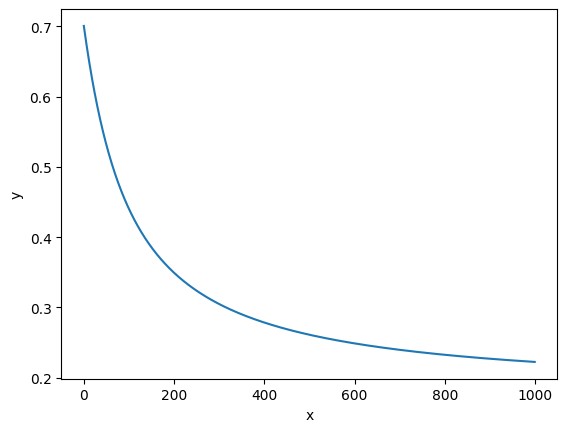

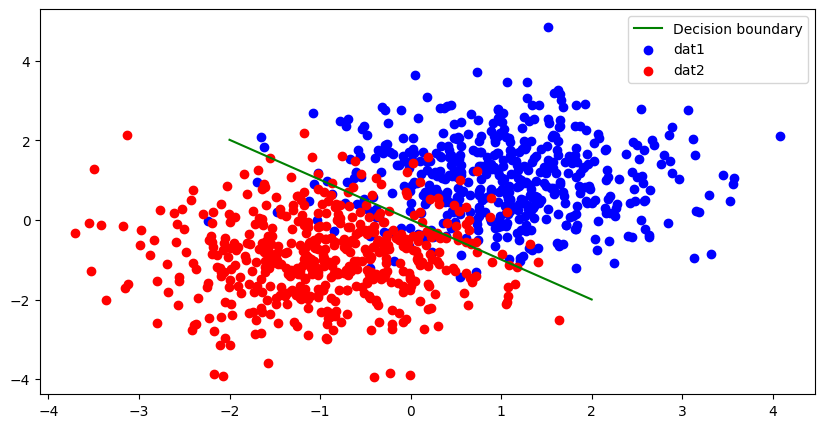

In [56]:
np.random.seed(42)
num_samples = 500

# 1-1. class 1
mean_1 = np.array([1.0,1.0])
cov_1 = np.array([[1,0],
                  [0,1]])
data_1 = np.random.multivariate_normal(mean_1,cov_1,num_samples)

# 1-2 class 0
mean_2 = np.array([-1.0,-1.0])
cov_2 = np.array([[1,0],
                  [0,1]])
data_2 = np.random.multivariate_normal(mean_2,cov_2,num_samples)

data = np.vstack((data_1,data_2))
data = torch.from_numpy(data).float()
labels = np.ones(num_samples*2)
labels[num_samples:]=0
labels = torch.from_numpy(labels).view(-1,1).float()


# 2. 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out
model = LogisticRegression(2,1)

# 3. 손실함수
loss_fn = nn.BCELoss()
optimizer= optim.SGD(model.parameters(),lr=0.01)
epochs = 1000
losses=[]

for epoch in range(epochs):
    optimizer.zero_grad()   #기울기 초기화
    outputs = model(data)  #예측값 계산
    loss = loss_fn(outputs,labels) #손실 계산
    loss.backward() #역전파진행
    optimizer.step()    #가중치 업데이트

    losses.append(loss.item())  #손실값 저장

    if (epoch+1) % 100 ==0:
        print(f"Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}")

plt.plot(losses)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.figure(figsize=(10,5))
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
x_plot = np.array([-2,2])
y_plot = (-b-w[0][0]*x_plot)/ w[0][1] #0 = w1 x1 +w2 x2 +b
plt.plot(x_plot,y_plot,color="g",label = "Decision boundary")
plt.scatter(data_1[:,0],data_1[:,1],color = "blue",label = "dat1")  #[[x,y]]좌표
plt.scatter(data_2[:,0],data_2[:,1],color = "red",label = "dat2")
plt.legend()
plt.show()



### 실습3. FashionMNIST 신경망

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512), 
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256), 
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64), 
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

In [ ]:
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}



Epoch : 1 ---------
Loss:  0.6035, [6336 / 60000]
Loss:  0.5091, [12736 / 60000]
Loss:  0.4511, [19136 / 60000]
Loss:  0.8026, [25536 / 60000]
Loss:  0.2897, [31936 / 60000]
Loss:  0.3008, [38336 / 60000]
Loss:  0.7229, [44736 / 60000]
Loss:  0.4441, [51136 / 60000]
Loss:  0.2969, [57536 / 60000]
Epoch : 2 ---------
Loss:  0.4106, [6336 / 60000]
Loss:  0.3680, [12736 / 60000]
Loss:  0.3589, [19136 / 60000]
Loss:  0.6390, [25536 / 60000]
Loss:  0.1998, [31936 / 60000]
Loss:  0.2324, [38336 / 60000]
Loss:  0.7260, [44736 / 60000]
Loss:  0.3360, [51136 / 60000]
Loss:  0.2270, [57536 / 60000]
Epoch : 3 ---------
Loss:  0.3754, [6336 / 60000]
Loss:  0.2984, [12736 / 60000]
Loss:  0.3027, [19136 / 60000]
Loss:  0.5370, [25536 / 60000]
Loss:  0.1574, [31936 / 60000]
Loss:  0.2070, [38336 / 60000]
Loss:  0.6348, [44736 / 60000]
Loss:  0.3087, [51136 / 60000]
Loss:  0.1948, [57536 / 60000]
Epoch : 4 ---------
Loss:  0.2915, [6336 / 60000]
Loss:  0.2386, [12736 / 60000]
Loss:  0.3409, [19136 / 6

c:\Users\ckddl\anaconda3\envs\pytorch-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ckddl\anaconda3\envs\pytorch-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ckddl\anaconda3\envs\pytorch-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ckddl\anaconda3\envs\pytorch-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ckddl\anaconda3\envs\pytorch-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANG

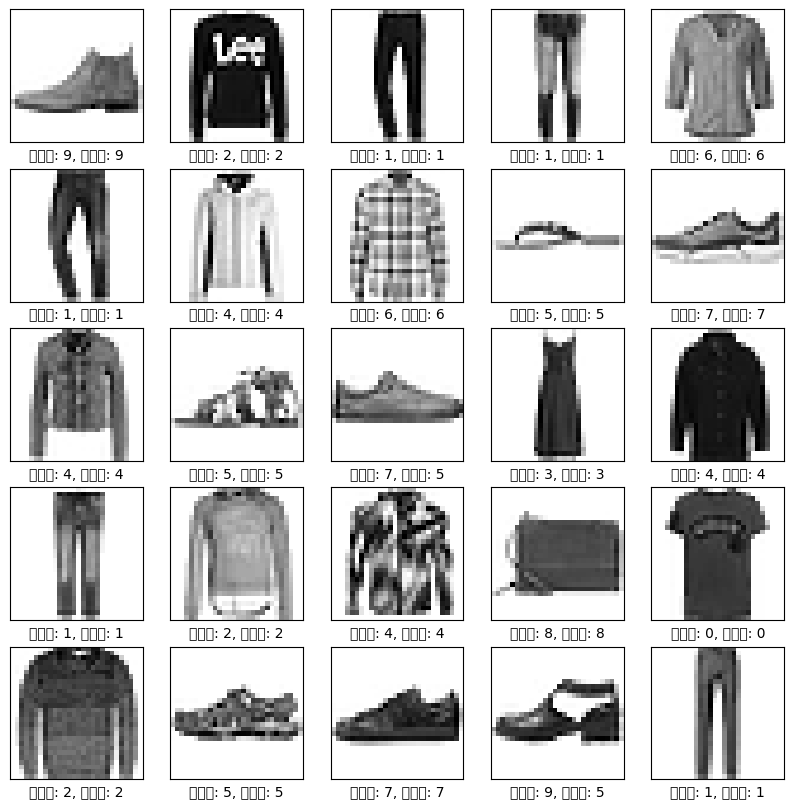

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512), # 입력층
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256), # 2층
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64), # 3층
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10) # 출력
        )
    def forward(self, x):
        out = self.flatten(x)
        out = self.linear_relu_stack(out)
        return out
model = NeuralNetwork().to(device)
loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10
for epoch in range(epochs):
    size = len(train_dataloader.dataset)
    print(f"Epoch : {epoch+1} ---------")
    for batch, (x, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(x)  # 모델 예측
        loss = loss_fnc(outputs, y)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        if (batch + 1) % 100 == 0:
            loss = loss.item()
            current = batch * len(x)
            print(f"Loss: {loss: .4f}, [{current} / {size}]")
test_size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss = 0
correct = 0
with torch.no_grad():
    for x, y, in test_dataloader:
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        test_loss += loss_fnc(outputs, y).item()
        correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
test_loss /= num_batches
accuracy = 100 * correct / test_size
print(f"정확도: {accuracy:.1f}%, 손실 평균: {test_loss:.4f}")
x, y = next(iter(test_dataloader))
x, y = x.to(device), y.to(device)
with torch.no_grad():
    outputs = model(x)
    _, predicted = torch.max(outputs, 1)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].cpu().numpy().squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f'실제값: {y[i].item()}, 예측값: {predicted[i].item()}')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()